In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2015-01-01'
end = '2022-12-31'

df = yf.download('AAPL', start, end)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910091,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912342,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247648,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179295,237458000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910091,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912342,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247648,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179295,237458000


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


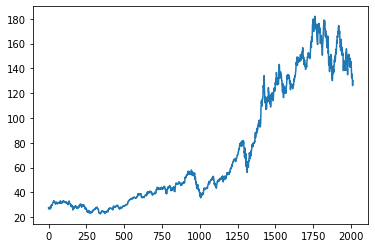

In [5]:
plt.plot(df.Close)


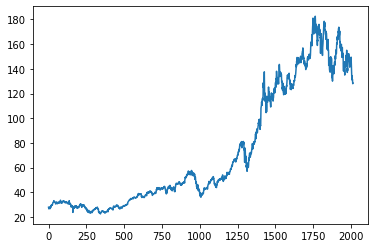

In [6]:
plt.plot(df.Open)

In [7]:
ma100 = df.Close.rolling(100).mean()



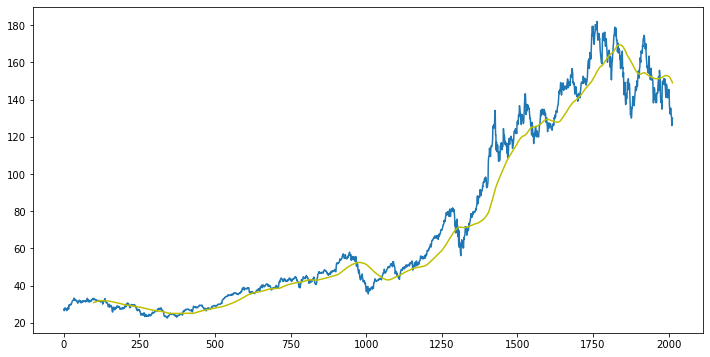

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'y')


In [9]:
 ma200 = df.Close.rolling(200).mean()

    

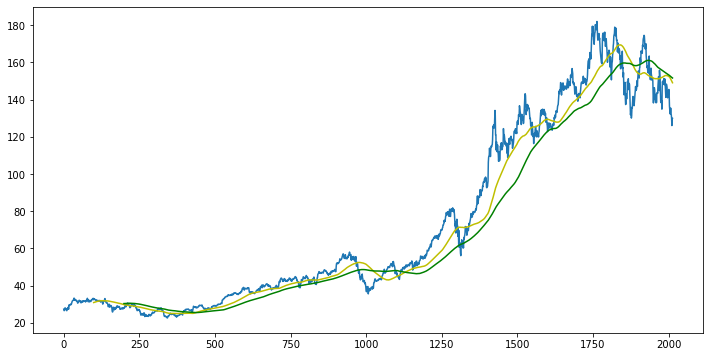

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'y')
plt.plot(ma200, 'g')


In [11]:
df.shape


(2014, 5)

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1409, 1)
(605, 1)


In [13]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [14]:
data_testing.head()

,Close
1409,111.112503
1410,112.727501
1411,109.375000
1412,113.010002
1413,115.010002


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05198896],
       [0.04355683],
       [0.04358422],
       ...,
       [0.95359602],
       [0.95794895],
       [1.        ]])

In [17]:
data_training_array.shape

(1409, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1309, 100, 1)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))





model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))




model.add(Dense(units = 1))
          
    

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 70)           33880     
                                                                 
 dropout_1 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           48320     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
41/41 [==============================] - 15s 233ms/step - loss: 0.0209
Epoch 2/50
41/41 [==============================] - 10s 242ms/step - loss: 0.0052
Epoch 3/50
41/41 [==============================] - 10s 236ms/step - loss: 0.0041
Epoch 4/50
41/41 [==============================] - 10s 238ms/step - loss: 0.0034
Epoch 5/50
41/41 [==============================] - 10s 241ms/step - loss: 0.0032
Epoch 6/50
41/41 [==============================] - 10s 234ms/step - loss: 0.0034
Epoch 7/50
41/41 [==============================] - 10s 242ms/step - loss: 0.0030
Epoch 8/50
41/41 [==============================] - 10s 237ms/step - loss: 0.0030
Epoch 9/50
41/41 [==============================] - 10s 235ms/step - loss: 0.0033
Epoch 10/50
41/41 [==============================] - 10s 242ms/step - loss: 0.0032
Epoch 11/50
41/41 [==============================] - 10s 235ms/step - loss: 0.0031
Epoch 12/50
41/41 [==============================] - 10s 241ms/step - loss: 0.0033
Epoch 13/50
4

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1409,111.112503
1410,112.727501
1411,109.375000
1412,113.010002
1413,115.010002


In [26]:
 data_testing.tail()

,Close
2009,131.860001
2010,130.029999
2011,126.040001
2012,129.610001
2013,129.929993


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\tarun\AppData\Local\Temp/ipykernel_20268/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [29]:
final_df.head()

,Close
0,63.215000
1,61.667500
2,61.195000
3,57.310001
4,56.092499


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.0419918 ],
       [0.06764351],
       [0.04639945],
       [0.0604364 ],
       [0.05940397],
       [0.03283898],
       [0.04082037],
       [0.03383169],
       [0.07564478],
       [0.06960907],
       [0.08279233],
       [0.08660432],
       [0.09704768],
       [0.12444655],
       [0.11924474],
       [0.12373183],
       [0.11600849],
       [0.10435404],
       [0.08735879],
       [0.10270616],
       [0.10058174],
       [0.11634604],
       [0.11674315],
       [0.10762998],
       [0.12579669],
       [0.13784818],
       [0.12845715],
       [0.13657754],
       [0.14531341],
       [0.15140868],
       [0.15758333],
       [0.17027024],
       [0.17995914],
       [0.17281159],
       [0.16534636],
       [0.16909885],
       [0.16546548],
       [0.17985983],
       [0.1762464 ],
       [0.18833764],
       [0.18361231],
       [0.187

In [31]:
input_data.shape

(705, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [34]:
#making predictions

y_predicted = model.predict(x_test)

19/19 [==============================] - 2s 72ms/step


In [35]:
y_predicted.shape


(605, 1)

In [36]:
y_test

array([0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790562,
       0.46709158, 0.46470905, 0.47229339, 0.47344491, 0.49383529,
       0.54224001, 0.55405326, 0.54585344, 0.55933451, 0.5473227 ,
       0.54571451, 0.57932771, 0.62014809, 0.59807015, 0.5145234 ,
       0.51515875, 0.45051326, 0.48625094, 0.45583419, 0.44400106,
       0.4706852 , 0.47211471, 0.44503346, 0.43081779, 0.40302181,
       0.42875299, 0.44249211, 0.40524554, 0.41398141, 0.44622473,
       0.46750851, 0.4605992 , 0.47425895, 0.48204185, 0.45210157,
       0.47973874, 0.45321347, 0.46846153, 0.46758794, 0.48347136,
       0.54247825, 0.51627059, 0.51698537, 0.51317333, 0.49975182,
       0.47560908, 0.48775989, 0.4826772 , 0.47378246, 0.46814386,
       0.46822329, 0.4805329 , 0.43764767, 0.47036753, 0.4190641 ,
       0.41834931, 0.43161201, 0.46742907, 0.49983126, 0.4971311 ,
       0.47830923, 0.47552965, 0.50348443, 0.50126077, 0.50165788,
       0.50991726, 0.50269028, 0.49188955, 0.49673399, 0.48640

In [37]:
y_predicted

array([[0.33769998],
       [0.35274705],
       [0.36931074],
       [0.38575816],
       [0.4011988 ],
       [0.415368  ],
       [0.42811352],
       [0.43925333],
       [0.44876343],
       [0.45667112],
       [0.46337533],
       [0.46996427],
       [0.47736788],
       [0.48585296],
       [0.49541605],
       [0.5054839 ],
       [0.5153    ],
       [0.52480143],
       [0.5345821 ],
       [0.54461086],
       [0.55298096],
       [0.5581844 ],
       [0.55846417],
       [0.5537981 ],
       [0.54452986],
       [0.5313836 ],
       [0.51593417],
       [0.4998303 ],
       [0.48403955],
       [0.4690311 ],
       [0.45469964],
       [0.44143498],
       [0.42993402],
       [0.42014468],
       [0.4120229 ],
       [0.40605038],
       [0.40291297],
       [0.40282363],
       [0.40576622],
       [0.41147685],
       [0.41886336],
       [0.42724288],
       [0.43556458],
       [0.44322693],
       [0.44986576],
       [0.45557767],
       [0.46145225],
       [0.467

In [38]:
scaler.scale_

array([0.00794171])

In [39]:
scale_factor = 1/0.00794171
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

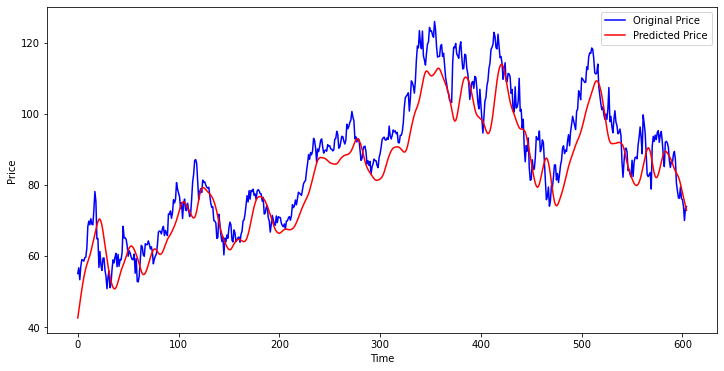

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()